In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import matplotlib.colors as mcolors
import pandas as pd
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 18})

def delay_scan_plots(fname,indir,boardNum,freq, ECOND=False):
    data2 = np.load(f'{indir}/{fname}.npz',allow_pickle=True )
    x = data2['errorcounts']
    y = data2['bitcounts']
    x = x.flatten()[0]
    y = y.flatten()[0]
    new_array = []                                                                                                                                                                                         
    new_array2 = []                                                                                                                                                                                        
    for i in range(6):                                                                                                                                                                                    
       new_array.append(list(np.array(x[i])/np.array(y[i]))) 

    new_array = np.array(new_array)
    
    if ECOND == True:
        a,b=np.meshgrid(np.arange(6),np.arange(63))
        norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 1, vcenter = 0.0001)
        plt.hist2d(a.flatten(),b.flatten(),weights=new_array.T.flatten(),bins=(np.arange(7),np.arange(64)),cmap='bwr',norm=norm);
        plt.colorbar().set_label(label='Transmission errors rate ',size=32)
        plt.title(f"Delay Scan for Board {boardNum} at {freq} MHz",size="28")
        plt.ylabel('Phase Select Setting', size=32)
        plt.xlabel('Channel Number', size=32)
        plt.savefig(f'./ECOND_delay_scan_board{boardNum}_{freq}.png',dpi=300, facecolor = "w")
        plt.figure()
    else: 
        a,b=np.meshgrid(np.arange(13),np.arange(63))
        norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 1, vcenter = 0.0001)
        plt.hist2d(a.flatten(),b.flatten(),weights=new_array.T.flatten(),bins=(np.arange(14),np.arange(64)),cmap='bwr',norm=norm);
        plt.colorbar().set_label(label='Transmission errors rate ',size=32)
        plt.title(f"Delay Scan for Board {boardNum} at {freq} MHz",size="28")
        plt.ylabel('Phase Select Setting', size=32)
        plt.xlabel('Channel Number', size=32)
        plt.savefig(f'./ECONT_delay_scan_board{boardNum}_{freq}.png',dpi=300, facecolor = "w")
        plt.figure()

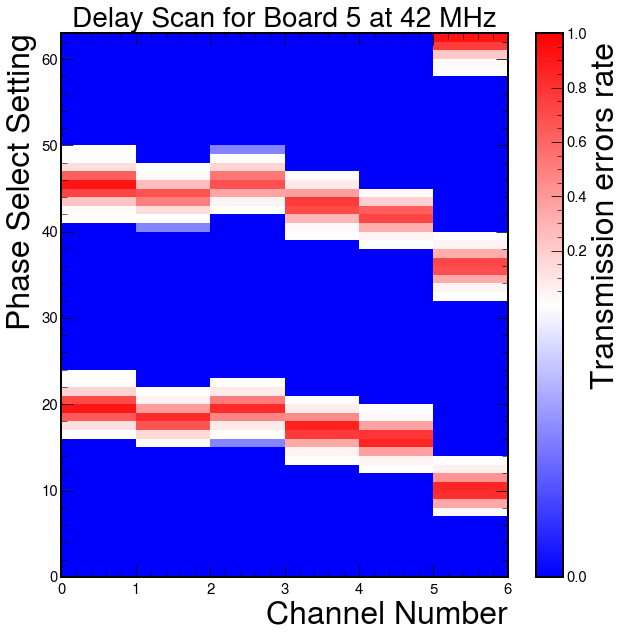

<Figure size 720x720 with 0 Axes>

In [7]:
delay_scan_plots("hexa46_board5_delayScan_42MHz","econ_plotting/exampleData",5,42,ECOND=True)